In [28]:
#pip install seaborn
#conda install statsmodels
#!pip install --upgrade --no-deps statsmodels



In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Statsmodels
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tools.eval_measures import rmse, aic

### Dataset

In [89]:
df = pd.read_csv('/Users/hugo.paula/Documents/hugo_doc/datasets/energydata_complete.csv', sep=',')
df = df.drop(labels=['rv1', 'rv2'], axis=1)
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [91]:
round(df.describe(),3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,...,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000,19735.000
mean,97.695,3.802,21.687,40.260,20.341,40.420,22.268,39.243,20.855,39.027,...,22.029,42.936,19.486,41.552,7.412,755.523,79.750,4.040,38.331,3.761
std,102.525,7.936,1.606,3.979,2.193,4.070,2.006,3.255,2.043,4.341,...,1.956,5.224,2.015,4.151,5.317,7.399,14.901,2.451,11.795,4.195
min,10.000,0.000,16.790,27.023,16.100,20.463,17.200,28.767,15.100,27.660,...,16.307,29.600,14.890,29.167,-5.000,729.300,24.000,0.000,1.000,-6.600
25%,50.000,0.000,20.760,37.333,18.790,37.900,20.790,36.900,19.530,35.530,...,20.790,39.067,18.000,38.500,3.667,750.933,70.333,2.000,29.000,0.900
50%,60.000,0.000,21.600,39.657,20.000,40.500,22.100,38.530,20.667,38.400,...,22.100,42.375,19.390,40.900,6.917,756.100,83.667,3.667,40.000,3.433
75%,100.000,0.000,22.600,43.067,21.500,43.260,23.290,41.760,22.100,42.157,...,23.390,46.536,20.600,44.338,10.408,760.933,91.667,5.500,40.000,6.567
max,1080.000,70.000,26.260,63.360,29.857,56.027,29.236,50.163,26.200,51.090,...,27.230,58.780,24.500,53.327,26.100,772.300,100.000,14.000,66.000,15.500


In [14]:
# # from plotly.plotly import plot_mpl
# from statsmodels.tsa.seasonal import seasonal_decompose
# # result = seasonal_decompose(y_appliances, model='multiplicative')
# # fig = result.plot()
# #result = seasonal_decompose(y_appliances, model='additive')
# result=seasonal_decompose(df['Appliances'],model='add',freq=365)

# # import statsmodels.api as sm
# # seas_d=sm.tsa.seasonal_decompose(df['Appliances'],model='add',freq=365);
# # fig=seas_d.plot()
# # fig.set_figheight(4)
# # plt.show()


In [15]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# # result = seasonal_decompose(y_appliances, model='multiplicative')
# #result = seasonal_decompose(y_appliances, model='additive')
# result=seasonal_decompose(y_appliances,model='add',period=100)

In [16]:
# fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(30,15))
# result.trend.plot(ax=ax1)
# result.resid.plot(ax=ax2)
# result.seasonal.plot(ax=ax3)

In [17]:
# import statsmodels.api as sm
# from matplotlib import pyplot
# from statsmodels.graphics.tsaplots import plot_acf
# #Correlograms
# fig,ax= plt.subplots(2,1, figsize=(15,10))
# fig=sm.tsa.graphics.plot_acf(df['TGS2602'], lags=200, ax=ax[0])
# fig=sm.tsa.graphics.plot_pacf(df['TGS2602'], lags=200, ax=ax[1])
# plt.show()

In [18]:
# fig.set_figheight(4)
# result.plot()
# plt.show()


In [50]:
#df['date'] = pd.to_datetime(df['date']).dt.normalize()

#df['date'] = pd.to_datetime(df['date']).dt.to_date

In [93]:
# import matplotlib.dates as mdates

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[20, 10])
# #ax.plot(df['T4'], label='T4')
# #ax.plot(df['T5'], label='T5')

# days = pd.to_datetime(df['date'])
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
# ax.plot(days,df['T7'], label='Temp. in ironing room (°C)')
# ax.plot(days,df['T9'], label='Temp. in parents room (°C)')
# handles, labels = ax.get_legend_handles_labels()
# lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
# ax.tick_params(axis='x', labelrotation=45)
# plt.rc('legend',fontsize=20) # using a size in points
# plt.rc('legend',fontsize='medium') # using a named size
# plt.show()

In [94]:
days = pd.to_datetime(df['date'])
days

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

In [95]:
df_2 = df[['T7','T9']]
days = pd.to_datetime(df['date'])

In [96]:
titles = ['Temperature in ironing room (°C)','Temperature in parents room (°C)']

df_2.rename(columns = {'T7': 'Temperature in ironing room (°C)', 
                       'T9' : 'Temperature in parents room (°C)'}, 
                       inplace = True)

df_2

/var/folders/36/krvg3mw93675wqcqth0rmrk00000gp/T/ipykernel_99852/1714394289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.rename(columns = {'T7': 'Temperature in ironing room (°C)',


,Temperature in ironing room (°C),Temperature in parents room (°C)
0,17.200000,17.033333
1,17.200000,17.066667
2,17.200000,17.000000
3,17.133333,17.000000
4,17.200000,17.000000
...,...,...
19730,24.500000,23.200000
19731,24.557143,23.200000
19732,24.540000,23.200000
19733,24.500000,23.200000


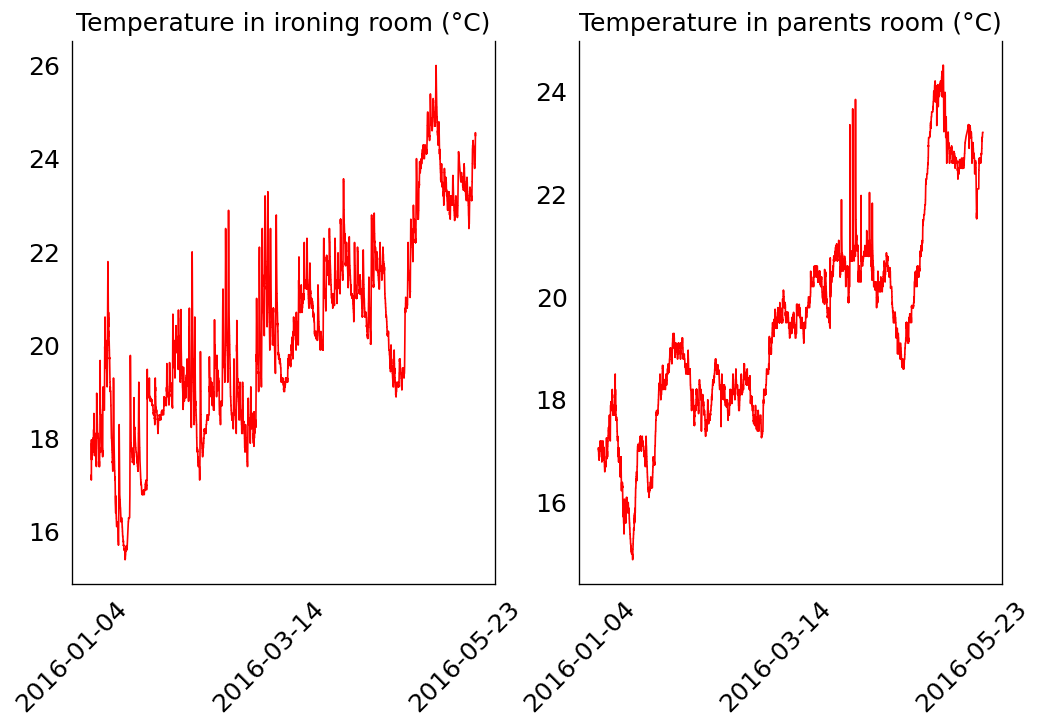

In [135]:
import matplotlib.ticker as ticker
tick_spacing = 70
# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,6))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
for i, ax in enumerate(axes.flatten()):
    data = df_2[df_2.columns[i]]
    ax.plot(days,data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_2.columns[i],fontsize=15)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=15)
    ax.tick_params(axis='x', labelrotation=45)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 70))
    


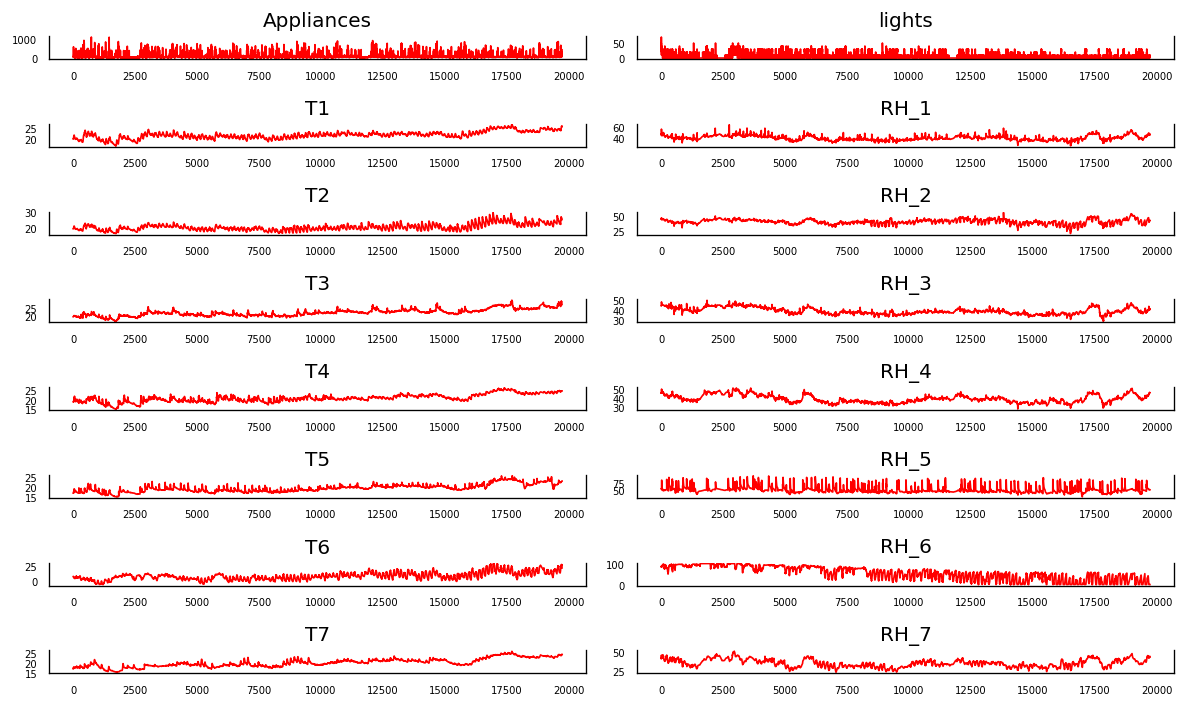

In [11]:
# Plot
fig, axes = plt.subplots(nrows=8, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [12]:
### Testing Causation using Granger’s Causality Test

In [13]:
# from statsmodels.tsa.stattools import grangercausalitytests
# maxlag=12
# test = 'ssr_chi2test'
# def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
#     """Check Granger Causality of all possible combinations of the Time series.
#     The rows are the response variable, columns are predictors. The values in the table 
#     are the P-Values. P-Values lesser than the significance level (0.05), implies 
#     the Null Hypothesis that the coefficients of the corresponding past values is 
#     zero, that is, the X does not cause Y can be rejected.

#     data      : pandas dataframe containing the time series variables
#     variables : list containing names of the time series variables.
#     """
#     df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
#     for c in df.columns:
#         for r in df.index:
#             test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
#             p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
#             if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
#             min_p_value = np.min(p_values)
#             df.loc[r, c] = min_p_value
#     df.columns = [var + '_x' for var in variables]
#     df.index = [var + '_y' for var in variables]
#     return df

# grangers_matrix = grangers_causation_matrix(df, variables = df.columns)     

In [14]:
#grangers_matrix

In [15]:
# f, ax = plt.subplots(figsize=(25, 20))
# sns.heatmap(grangers_matrix, cmap='RdYlGn_r', annot=True,linewidths=.5)

### Correlation Test

<AxesSubplot:>

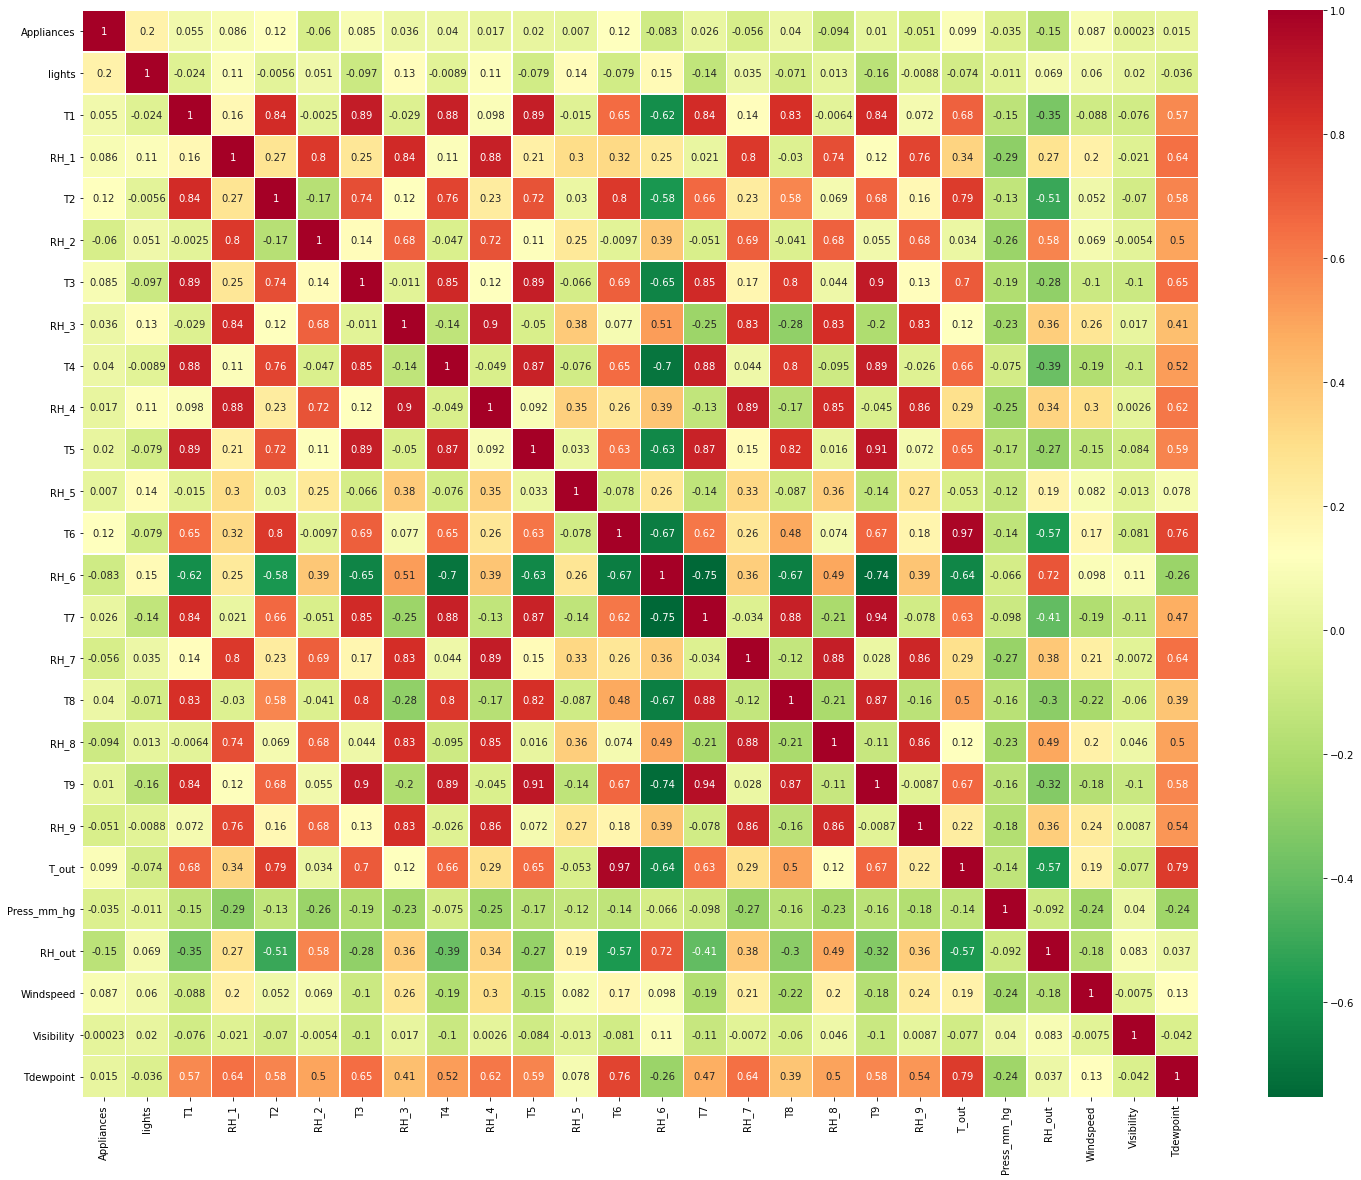

In [16]:
cov_data= df.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(cov_data, cmap='RdYlGn_r', annot=True,linewidths=.5)

In [17]:
cov_data= df.corr()
cov_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509


In [25]:
# from statsmodels.tsa.vector_ar.vecm import coint_johansen

# def cointegration_test(df, alpha=0.05): 
#     """Perform Johanson's Cointegration Test and Report Summary"""
#     out = coint_johansen(df,-1,5)
#     d = {'0.90':0, '0.95':1, '0.99':2}
#     traces = out.lr1
#     cvts = out.cvt[:, d[str(1-alpha)]]
#     def adjust(val, length= 6): return str(val).ljust(length)

#     # Summary
#     print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
#     for col, trace, cvt in zip(df.columns, traces, cvts):
#         print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

# cointegration_test(df)

In [24]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [25]:
# ADF Test on each column
for name, column in df.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Appliances" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -21.6164
 No. Lags Chosen       = 11
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "lights" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -21.5759
 No. Lags Chosen       = 15
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "T1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

    Augmented Dickey-Fuller Test on "T_out" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.3767
 No. Lags Chosen       = 45
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Press_mm_hg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7173
 No. Lags Chosen       = 43
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "RH_out" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Leve

In [26]:
df_differenced = df.diff().dropna()
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Appliances" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -29.8659
 No. Lags Chosen       = 42
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "lights" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -29.9861
 No. Lags Chosen       = 45
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "T1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level 

    Augmented Dickey-Fuller Test on "T_out" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -22.5735
 No. Lags Chosen       = 45
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Press_mm_hg" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.505
 No. Lags Chosen       = 42
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "RH_out" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Lev

### KPSS test

In [27]:
# regression='ct'
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, name='', **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Test on "{name}"', "\n   ", '-'*47)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')


In [28]:
for name, column in df.iteritems():
    kpss_test(column, name=column.name)
    print('\n')

KPSS Test on "Appliances" 
    -----------------------------------------------
KPSS Statistic: 0.03892801361687985
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "lights" 
    -----------------------------------------------
KPSS Statistic: 4.728576720208184
p-value: 0.01
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "T1" 
    -----------------------------------------------
KPSS Statistic: 21.87581707300442
p-value: 0.01
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS Test on "RH_1" 
    -----------------------------------------------
KPSS Statistic: 2.877921129856753
p-value: 0.01
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


KPSS 

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2072: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  war

In [29]:
df_differenced = df.diff().dropna()
for name, column in df_differenced.iteritems():
    kpss_test(column, name=column.name)
    print('\n')

KPSS Test on "Appliances" 
    -----------------------------------------------
KPSS Statistic: 0.004728250272411956
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "lights" 
    -----------------------------------------------
KPSS Statistic: 0.006424252966743214
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "T1" 
    -----------------------------------------------
KPSS Statistic: 0.006224805825555264
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test on "RH_1" 
    -----------------------------------------------
KPSS Statistic: 0.02523338260326237
p-value: 0.1
num lags: 45
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


KPSS Test o

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:2076: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  war